<h2> Este código classifica imagens </h2>

In [1]:
#Load the data to classify
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
#Divisão da base:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 223s 1us/step


In [3]:
#Podemos ver que todos são numpy arrays
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h4> São 50000 imagens, com 32x32 pixels com profundidade de 3 (RGB) </h4>

In [4]:
#Continuing to explore the data:
#Get the shapes:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
#To see the first image (at index=0) in the training data set 

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

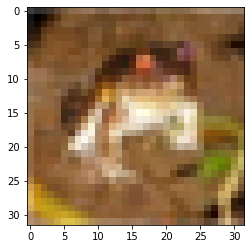

In [7]:
#Show the image as a picture, not a sequence of arrays in RGB:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [8]:
#Print the label of the image
print('The label is:', y_train[0])

The label is: [6]


<h4> One Hot Encoder </h4>

In [9]:
#Creating the y data set:
#One-Hot Encoding: Conver the labels into a set of 10 numbers to input into the neural network:

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the labels for the training dataset:
print(y_train_one_hot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
y_train_one_hot.shape

(50000, 10)

In [11]:
#Print an example of the new labels:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<h4> Número de GPUs disponíveis </h4>
(Quando rodo no Linux dá 0 porque o CUDA não está instalado, mas no Windows dá 1, porque CUDA e cuDNN estão devidamente instalados)

In [12]:
import tensorflow as tf

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


<h4> Normalização nos previsores</h4>

In [14]:
#Normalize the pixels in the images to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255

<h4> Construção da CNN </h4>

In [15]:
#Arquitetura
from keras.models import Sequential 
#Tipo de camada:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Create the architecture
model = Sequential()

#Convolution layer
#5x5 dimensão do filtro
#A dimensão só é necessária ser informada na primeira camada que recebe a iamgem
#Aplicarei 32 filtros 
# Número de linhas no kernel de convolução : 5
# Número de colunas do kernel de convolução : 5
#Dimensão da entrada: 32x32 imagem RGB. Espacialmente é tridimensional
# Função de ativação utilizada : Unidade linear retificada (ReLu)
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(32,32,3)))


In [16]:
#MaxPooling layer
#Se a imagem era originalmente de 32x32 ela será reduzida para 16x16
model.add(MaxPooling2D(pool_size = (2,2)))

#Próxima camada de convolução :
model.add(Conv2D(32, (5,5), activation = 'relu'))

#Próxima camada de MaxPooling:
model.add(MaxPooling2D(pool_size = (2,2)))

#Flatten Layer:
model.add(Flatten())

#Create the neural network
model.add(Dense(1000,activation='relu'))


In [17]:
import numpy as np
#Last layer which is responsible to return probabilies:

output_dimension= np.array(y_train_one_hot[0].shape)
model.add(Dense(output_dimension[0], activation='softmax'))

In [18]:
#Compile the model:
#Categorical cross entropy is used when the output class is greater than two, 
#and it is our case here, where we have 10 different classes
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

<h4>  Treinar o modelo </h4>

In [19]:
#Train (fit) the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 10s 293us/step - loss: 1.6968 - accuracy: 0.3868 - val_loss: 1.4838 - val_accuracy: 0.4689
Epoch 2/10
35000/35000 [==============================] - 7s 202us/step - loss: 1.3421 - accuracy: 0.5206 - val_loss: 1.3021 - val_accuracy: 0.5377
Epoch 3/10
35000/35000 [==============================] - 7s 202us/step - loss: 1.1962 - accuracy: 0.5780 - val_loss: 1.2228 - val_accuracy: 0.5674
Epoch 4/10
35000/35000 [==============================] - 7s 200us/step - loss: 1.0914 - accuracy: 0.6157 - val_loss: 1.1499 - val_accuracy: 0.5968
Epoch 5/10
35000/35000 [==============================] - 8s 217us/step - loss: 1.0064 - accuracy: 0.6473 - val_loss: 1.0542 - val_accuracy: 0.6336
Epoch 6/10
35000/35000 [==============================] - 8s 220us/step - loss: 0.9531 - accuracy: 0.6677 - val_loss: 1.0512 - val_accuracy: 0.6383
Epoch 7/10
35000/35000 [==============================] - 8s 

In [20]:
model.save('cnn.h5')